In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
telco = pd.read_csv('./data/credit_train.csv')

Подготовка данных к моделированию

In [3]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  int64  
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null 

In [4]:
# возьмем последние 10 элементов
telco.tail(10)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
99990,686017b3-dc24-4f8a-af92-0bd077452d3d,1a583add-21ba-410f-9c42-757c4ed19322,Fully Paid,99999999,Short Term,742.0,1190046.0,< 1 year,Rent,other,11969.81,20.1,16.0,9,0,37392,134442.0,0.0,0.0
99991,326d0f2b-015f-480e-90e9-9c0d7d307196,ed9a397b-8a72-45c2-92de-b91f990a623d,Fully Paid,244266,Short Term,714.0,1619047.0,10+ years,Rent,Debt Consolidation,4290.39,21.4,NaN,5,1,132012,242660.0,1.0,0.0
99992,c568adaa-16f9-43d3-b522-8532fb57cb16,cbb29fd6-e418-4f09-a4bd-4de83428caab,Fully Paid,48796,Short Term,NaN,NaN,4 years,Home Mortgage,major_purchase,8298.63,8.3,NaN,9,0,87875,239404.0,0.0,0.0
99993,79b81158-5d55-4766-8ad6-ebcd683f7d59,e45e8dc4-05ad-4efe-92cc-784a6d5ef61a,Fully Paid,44484,Short Term,717.0,1152426.0,10+ years,Home Mortgage,small_business,6280.64,21.0,12.0,6,0,961932,0.0,0.0,0.0
99994,8506a4e9-af7d-47d2-a1bf-7ea2c41858f0,be67200e-1ef1-4b63-86a6-2bf27d3c704d,Fully Paid,210584,Short Term,719.0,783389.0,1 year,Home Mortgage,Other,3727.61,17.4,18.0,6,0,456,259160.0,0.0,0.0
99995,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,Fully Paid,147070,Short Term,725.0,475437.0,7 years,Own Home,other,2202.86,22.3,NaN,5,0,47766,658548.0,0.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22,0,153045,509234.0,0.0,0.0
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,18.0,12,1,109554,537548.0,1.0,0.0
99998,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Fully Paid,530332,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,NaN,8,0,404225,738254.0,0.0,0.0
99999,c63916c6-6d46-47a9-949a-51d09af4414f,1b3014be-5c07-4d41-abe7-44573c375886,Fully Paid,99999999,Short Term,743.0,935180.0,NaN,Own Home,Debt Consolidation,9118.10,13.0,NaN,4,1,45600,91014.0,1.0,0.0


In [5]:
# количество пропущенных = 0
telco.isnull().sum().sort_values()

Loan ID                             0
Current Credit Balance              0
Number of Credit Problems           0
Number of Open Accounts             0
Years of Credit History             0
Monthly Debt                        0
Home Ownership                      0
Purpose                             0
Term                                0
Current Loan Amount                 0
Loan Status                         0
Customer ID                         0
Maximum Open Credit                 2
Tax Liens                          10
Bankruptcies                      204
Years in current job             4222
Annual Income                   19154
Credit Score                    19154
Months since last delinquent    53141
dtype: int64

In [6]:
# вывод дублирующих наблюдений, отсортировали по текущему размеру долга
telco[telco.duplicated()].sort_values('Current Loan Amount')

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
79169,50118373-dd2c-402d-918b-a9e49d921eac,66a2647a-daec-494b-8588-2c846bba495f,Fully Paid,15422,Short Term,718.0,361760.0,< 1 year,Rent,Debt Consolidation,3738.06,11.6,NaN,4,0,0,0.0,0.0,0.0
81961,95ee0fe0-7e24-4b6d-bd08-797164f72ceb,cf0027fa-0825-4f09-8421-9d5cf90f558a,Fully Paid,21450,Short Term,713.0,463182.0,6 years,Rent,Medical Bills,13161.87,7.1,NaN,10,0,83657,160886.0,0.0,0.0
32159,d9cd4ffd-b274-466e-9c6a-6561f09721fe,b415677e-0c22-4ba5-a069-51045a21e351,Fully Paid,21472,Short Term,718.0,1131184.0,10+ years,Home Mortgage,other,23095.07,27.1,15.0,14,0,547029,1170796.0,0.0,0.0
97279,0f5850ad-1c8d-4145-b796-7eead9ff4cbb,9747b64f-ad09-42f6-87ac-c34192972a92,Fully Paid,21516,Short Term,680.0,754281.0,NaN,Rent,other,15965.51,41.8,7.0,6,0,80997,162822.0,0.0,0.0
65822,98c570ef-75a6-40d9-915b-679c5a420178,1507af8f-156a-48c4-9882-eb9f2380d4e7,Fully Paid,21582,Short Term,723.0,1118454.0,10+ years,Home Mortgage,Debt Consolidation,23767.10,27.7,9.0,9,0,18810,183018.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38301,9ad4bbbb-f6c8-489b-bf72-59e1b2540d3f,b5f3fb8d-95f7-4df9-8180-e5ee8a46de70,Fully Paid,789096,Long Term,681.0,2433900.0,6 years,Home Mortgage,Debt Consolidation,39956.43,28.1,NaN,17,0,2191726,2589576.0,0.0,0.0
87728,37bfacc7-81bd-4287-986e-3307e3a4f6b9,e7a64746-58be-4a10-89e9-35705e412eab,Fully Paid,789096,Long Term,723.0,2433900.0,10+ years,Home Mortgage,Debt Consolidation,54965.67,33.5,NaN,13,0,252225,605946.0,0.0,0.0
91606,4e69afa3-df35-40a5-bfe0-5b261a007c8d,222ca98a-2239-4ce1-b3bf-2fd2b75175f8,Fully Paid,789096,Long Term,640.0,1522641.0,1 year,Home Mortgage,Debt Consolidation,30326.09,21.0,13.0,16,0,478401,768306.0,0.0,0.0
55736,8d59aa00-d111-4439-9b32-82cc5ab5b940,4703635a-4418-4e97-bc74-30320a99eca5,Fully Paid,789184,Long Term,716.0,1596798.0,3 years,Home Mortgage,Debt Consolidation,44710.23,28.5,NaN,15,0,921139,1760044.0,0.0,0.0


Построим сводные таблицы

In [7]:
# сводная таблица, показывает сумму выплаченных и невыплаченных кредитов, а также медиану суммы кредита
# -> средняя сумма кредита взятого < средняя сумма выплаченных
telco.pivot_table(values='Current Loan Amount', index='Loan Status', aggfunc=["sum", "median"])

,sum,median
,Current Loan Amount,Current Loan Amount
Loan Status,,
Charged Off,7357114160,286726
Fully Paid,1168687624786,321266


In [8]:
# а здесь, в сводной таблице мы видим выборку уникальных значений человеков, взявших когда либо кредит
# общую сумму, меданное значение и количество кредитов
telco.pivot_table(values='Current Loan Amount', index='Customer ID', aggfunc=["sum", "median", "count"])

,sum,median,count
,Current Loan Amount,Current Loan Amount,Current Loan Amount
Customer ID,,,
00003c89-d86a-48a2-9f95-e1ec9d488ee1,86592,86592.0,1
0002005f-3575-462e-bb81-714530e8e752,140844,140844.0,1
00024ad3-b367-44e3-81ff-4bee18ed00b4,99999999,99999999.0,1
0003f10e-f8f4-4eb1-9bb8-b980fdda707c,262680,262680.0,1
00062646-806a-4e8c-8cfd-afeb458cdf22,406934,406934.0,1
...,...,...,...
fffc6027-7506-4a93-bf58-6346730f2602,100335587,50167793.5,2
fffdceed-eefe-48e6-97a1-140395719348,1515228,757614.0,2


In [9]:
def pvt_tbl(dataframe, index_col, value_col, columns_col = None, aggfunc_col=["median"]):
    pv_table = dataframe.pivot_table(values = value_col, index=index_col, aggfunc=aggfunc_col,columns= columns_col)
    return pv_table

In [10]:
# получаем средний кредитный счет с классификацией по 1. имеет жилье/снимает 2. По целям
for element in ["Home Ownership", "Purpose"]:
    print(pvt_tbl(telco, index_col=element, value_col="Credit Score"))

                     median
               Credit Score
Home Ownership             
HaveMortgage          719.0
Home Mortgage         725.0
Own Home              723.0
Rent                  723.0
                           median
                     Credit Score
Purpose                          
Business Loan               712.0
Buy House                   713.0
Buy a Car                   734.0
Debt Consolidation          725.0
Educational Expenses        733.5
Home Improvements           725.0
Medical Bills               715.0
Other                       724.0
Take a Trip                 718.0
major_purchase              730.5
moving                      707.0
other                       714.0
renewable_energy            710.0
small_business              711.0
vacation                    714.0
wedding                     720.5


Выходит, что самый высокий кредитный счет у людей, кто вкладывал в активы(Education, major_purchase, Buy a Car)
Самый низкий: кто вкладывал в то, что не приносят доход(moving, small_business, renewable_energy, vacation)
small_business - понятно, более 90% отмирают в течение 90 дней после создания
renewable_energy - думаю, что тоже. В данный момент эти проекты убыточны, в тч. проект илона маска
vacation/moving - думаю, что не стоить объяснять

*ДИАГРАММЫ*

In [11]:
# получили типы кредитов, еще не выплаченных
telco[
    (telco["Loan Status"]=="Charged Off")
]["Term"].value_counts(normalize=True)

Short Term    0.630461
Long Term     0.369539
Name: Term, dtype: float64

<AxesSubplot:>

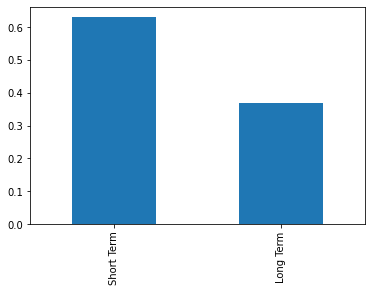

In [12]:
# получили типы кредитов, еще не выплаченных
telco[
    (telco["Loan Status"]=="Charged Off")
]["Term"]\
.value_counts(normalize=True)\
.plot(kind ="bar")

Видно, что краткосрочные кредиты берут в 2 раза чаще

In [13]:

telco['Customer ID'].isin(telco[telco.duplicated()]['Customer ID'])


0         True
1        False
2        False
3         True
4        False
         ...  
99995     True
99996    False
99997    False
99998    False
99999    False
Name: Customer ID, Length: 100000, dtype: bool

<AxesSubplot:>

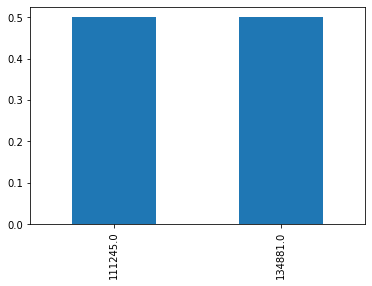

In [14]:
# выберем всех с доходом <150000, которые имеют несколько записей о кредитах
telco[
    (telco["Annual Income"]<150000)  &
    (telco['Customer ID'].isin(telco[telco.duplicated()]['Customer ID']))
]["Annual Income"]\
.value_counts(normalize=True)\
.plot(kind ="bar")

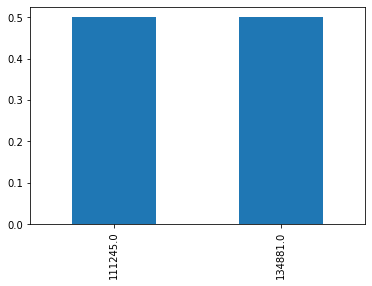

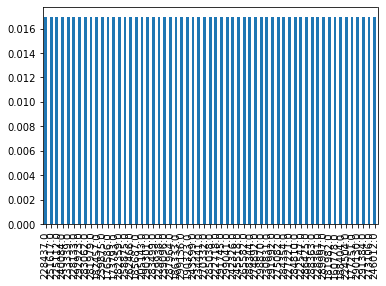

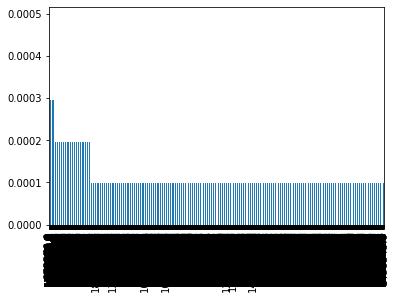

In [15]:
# три диаграммы, первая показывает средний доход людей, у которых < 2 кредитов и сумма дохода <150000
#                 Вторая, сумма дохода 150000.. 300000
def fun1(i):
    return i<150000
def fun2(i):
    return (150000 <= i) & (i<=300000)
def fun3(i):
    return i>300000
for element in [fun1, fun2,fun3]:
    telco[
        element(telco['Annual Income'])  &
        (telco['Customer ID'].isin(telco[telco.duplicated()]['Customer ID']))
    ]["Annual Income"]\
    .value_counts(normalize=True)\
    .plot(kind ="bar")
    plt.show()

Коробчатые диаграммы

In [17]:
plt.figure(figsize=(12,12))
sns.boxplot(data = telco, x="Annual Income", y="Current Loan Amount")


KeyboardInterrupt



Error in callback <function flush_figures at 0x7fa945bf9d30> (for post_execute):



KeyboardInterrupt



In [18]:
telco.corr()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.096652,0.013112,-0.006643,0.019282,0.011248,0.001478,-0.002795,0.003880,-0.001271,-0.000608,-0.002048
Credit Score,-0.096652,1.000000,-0.017078,-0.001674,-0.009720,-0.003739,0.006435,-0.003022,-0.000104,-0.002827,-0.006935,0.005146
Annual Income,0.013112,-0.017078,1.000000,0.485230,0.161669,-0.077577,0.146175,-0.017006,0.312340,0.053064,-0.047672,0.040167
Monthly Debt,-0.006643,-0.001674,0.485230,1.000000,0.199289,-0.056818,0.411353,-0.055383,0.481348,0.039268,-0.078979,0.020119
Years of Credit History,0.019282,-0.009720,0.161669,0.199289,1.000000,-0.044292,0.132349,0.061588,0.208470,0.031124,0.066247,0.017245
Months since last delinquent,0.011248,-0.003739,-0.077577,-0.056818,-0.044292,1.000000,-0.032569,0.104642,-0.028662,-0.008785,0.123951,0.012624
Number of Open Accounts,0.001478,0.006435,0.146175,0.411353,0.132349,-0.032569,1.000000,-0.013995,0.228136,0.031341,-0.024575,0.006545
Number of Credit Problems,-0.002795,-0.003022,-0.017006,-0.055383,0.061588,0.104642,-0.013995,1.000000,-0.112516,-0.012072,0.752942,0.581290
Current Credit Balance,0.003880,-0.000104,0.312340,0.481348,0.208470,-0.028662,0.228136,-0.112516,1.000000,0.139204,-0.122603,-0.015645
Maximum Open Credit,-0.001271,-0.002827,0.053064,0.039268,0.031124,-0.008785,0.031341,-0.012072,0.139204,1.000000,-0.014574,-0.001029


Можно увидеть, что Current Credit Balance больше всего зависит от Annual Income, Monthly Debt и Number of Open Accounts, что В целом логично

Maximum Open Credit зависит от лет в кредитной истории

In [40]:
telco_dummies = pd.get_dummies(telco[telco['Annual Income']<200000].head(5))

In [41]:
telco_dummies.corr()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,...,Loan Status_Charged Off,Loan Status_Fully Paid,Term_Short Term,Years in current job_2 years,Years in current job_7 years,Years in current job_< 1 year,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Debt Consolidation,Purpose_other
Current Loan Amount,1.000000,-0.845902,-0.790559,-0.116831,0.331120,1.0,0.698828,NaN,0.664384,0.664753,...,-0.845900,0.845900,NaN,-0.545983,0.717559,-0.048870,0.061481,-0.061481,-0.144692,0.144692
Credit Score,-0.845902,1.000000,0.444231,-0.403838,0.058189,-1.0,-0.308013,NaN,-0.343230,-0.181855,...,1.000000,-1.000000,NaN,0.408009,-0.249951,-0.249756,-0.250146,0.250146,0.408487,-0.408487
Annual Income,-0.790559,0.444231,1.000000,0.435741,-0.549516,-1.0,-0.858505,NaN,-0.840261,-0.898294,...,0.444279,-0.444279,NaN,0.632917,-0.906620,0.131459,-0.116190,0.116190,-0.270164,0.270164
Monthly Debt,-0.116831,-0.403838,0.435741,1.000000,-0.832516,-1.0,-0.431850,NaN,-0.270629,-0.686899,...,-0.403932,0.403932,NaN,-0.101182,-0.658109,0.782032,0.178443,-0.178443,-0.228627,0.228627
Years of Credit History,0.331120,0.058189,-0.549516,-0.832516,1.000000,1.0,0.268679,NaN,0.121100,0.575243,...,0.058371,-0.058371,NaN,0.262128,0.569116,-0.890155,0.350225,-0.350225,-0.214468,0.214468
Months since last delinquent,1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.0,1.000000,NaN,1.000000,1.000000,...,-1.000000,1.000000,NaN,-1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
Number of Open Accounts,0.698828,-0.308013,-0.858505,-0.431850,0.268679,1.0,1.000000,NaN,0.978625,0.940039,...,-0.308148,0.308148,NaN,-0.833432,0.943705,0.077037,-0.404445,0.404445,0.581830,-0.581830
Number of Credit Problems,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Credit Balance,0.664384,-0.343230,-0.840261,-0.270629,0.121100,1.0,0.978625,NaN,1.000000,0.867207,...,-0.343406,0.343406,NaN,-0.921460,0.869054,0.259499,-0.367587,0.367587,0.641070,-0.641070
Maximum Open Credit,0.664753,-0.181855,-0.898294,-0.686899,0.575243,1.0,0.940039,NaN,0.867207,1.000000,...,-0.181910,0.181910,NaN,-0.606224,0.997043,-0.254573,-0.259147,0.259147,0.457695,-0.457695


In [ ]:
# 800 break the heatmap
#plt.figure(figsize=(12,12))
#sns.heatmap(telco_dummies.corr(), cmap="coolwarm", annot = True)


sns.lineplot(data=telco, x="Annual Income", y="Monthly Debt")

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
del telco_dummies['Months since last delinquent']
del telco_dummies['Bankruptcies']
# contains NaN

X = telco_dummies.drop(labels=["Credit Score"], axis=1)

In [ ]:
Y = telco_dummies["Credit Score"]

In [ ]:
X_test, X_train, y_test, y_train  =  train_test_split(X,Y, test_size=.25, random_state=2)

In [35]:
X_train

,Current Loan Amount,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Tax Liens,Loan ID_03a1d73c-9eae-471a-8b96-5d06b7feb3d9,...,Home Ownership_Rent,Purpose_Business Loan,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_other
83169,75482,181982.0,5535.08,8.6,3,0,221882,269302.0,0.0,0,...,1,0,0,1,0,0,0,0,0,0
28313,65098,149986.0,1087.37,11.7,12,0,49362,158312.0,0.0,0,...,1,0,1,0,0,0,0,0,0,0
55832,47036,185687.0,2204.95,9.4,5,0,63859,85096.0,0.0,0,...,1,0,0,1,0,0,0,0,0,0
23157,60236,188404.0,1467.94,9.0,4,0,89661,211024.0,0.0,0,...,1,0,0,1,0,0,0,0,0,0
17500,60368,193097.0,4457.21,8.9,4,0,160588,212498.0,0.0,0,...,1,0,0,1,0,0,0,0,0,0
22511,99999999,149891.0,960.64,14.0,6,0,21375,26708.0,0.0,0,...,1,0,0,0,1,0,0,0,0,0
2267,72336,192223.0,2806.49,12.3,4,0,8417,100496.0,0.0,0,...,1,0,0,0,0,0,0,0,0,1
24067,47894,130150.0,2971.41,21.3,3,0,100510,191730.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
24695,46530,151278.0,3504.74,11.5,4,0,100643,251702.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
13090,22462,97033.0,1455.59,12.0,5,0,18658,83050.0,0.0,0,...,1,0,0,1,0,0,0,0,0,0


In [36]:
log_reg = LogisticRegression().fit(X_train, y_train)

/home/c0sta/PycharmProjects/1899_full_msu_courser_data_analisis/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
log_reg.score(X_train,y_train)

0.36

In [38]:
log_reg.score(X_test,y_test)

0.013333333333333334